# Breast Cancer Wisconsin

### Step 1: Import Libraries

In [1]:
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

### Step 2: Load Data

In [2]:
# Unzipping the file
with zipfile.ZipFile('Breast Cancer Wisconsin.zip', 'r') as zip_ref:
    zip_ref.extractall('Breast_Cancer_Wisconsin')

# Get list of all files in the extracted folder
file_list = os.listdir('Breast_Cancer_Wisconsin')

# Load the CSV file into a DataFrame
csv_file = [file for file in file_list if file.endswith('.csv')][0]
df = pd.read_csv(f'Breast_Cancer_Wisconsin/{csv_file}')

### Step 3: Data Preprocessing

In [3]:
df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore', inplace=True)  # Drop unnecessary columns
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Convert diagnosis to binary
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

### Step 4: Train and Evaluate Models

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Performance:
Accuracy: 0.9790209790209791
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


SVM Performance:
Accuracy: 0.9790209790209791
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


Random Forest Performance:
Accuracy: 0.9790209790209791
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy    

### Step 5: Confusion Matrix

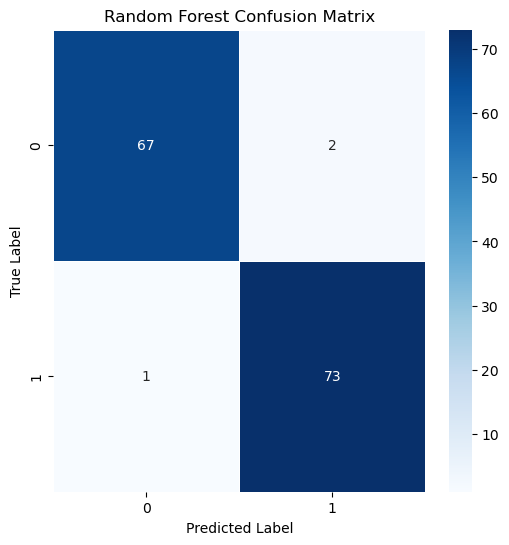


Cross-validation scores for Random Forest: [0.94405594 0.97902098 0.97202797 0.97902098 0.96478873]
Mean CV score: 0.9677829213040481


In [5]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_scaled, y_resampled, cv=5)
print(f"\nCross-validation scores for Random Forest: {cv_scores_rf}")
print(f"Mean CV score: {cv_scores_rf.mean()}")

### Step 6: Hypterparameter and Evluate Best Model

In [6]:
# Hyperparameter Tuning with GridSearchCV (for Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print(f"\nBest Parameters from GridSearchCV: {rf_grid_search.best_params_}")

best_rf_model = rf_grid_search.best_estimator_

# Predictions and evaluation for the best model
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nBest Random Forest Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(classification_report(y_test, y_pred_best_rf))


Best Parameters from GridSearchCV: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest Performance after Hyperparameter Tuning:
Accuracy: 0.9790209790209791
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



### Step 7: Save

In [7]:
# Model Saving
joblib.dump(best_rf_model, 'breast_cancer_rf_model.pkl')
print("\nBest Random Forest Model saved successfully!")


Best Random Forest Model saved successfully!
